In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
data = pd.read_csv("uber.csv")



In [3]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [6]:

data.dropna(inplace=True)


In [7]:

missing_values = data.isnull().sum()
print("Missing values after handling:")
print(missing_values)

Missing values after handling:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [8]:

z_scores = zscore(data.select_dtypes(include='number'), axis=0)

outliers = (z_scores > 3) | (z_scores < -3)

data_no_outliers = data.select_dtypes(include='number').mask(outliers, np.nan)

In [9]:
numeric_data = data.select_dtypes(include=[float, int])

In [10]:
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.000587          0.000230        -0.000341   
fare_amount          0.000587     1.000000          0.010458        -0.008482   
pickup_longitude     0.000230     0.010458          1.000000        -0.816461   
pickup_latitude     -0.000341    -0.008482         -0.816461         1.000000   
dropoff_longitude    0.000270     0.008986          0.833026        -0.774787   
dropoff_latitude     0.000271    -0.011014         -0.846324         0.702367   
passenger_count      0.002259     0.010158         -0.000415        -0.001559   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000270          0.000271         0.002259  
fare_amount                 0.008986         -0.011014         0.010158  
pickup_longitude            0.833026         -0.846324        -0.000415  
pickup_latitude            -0.774787          0.702367 

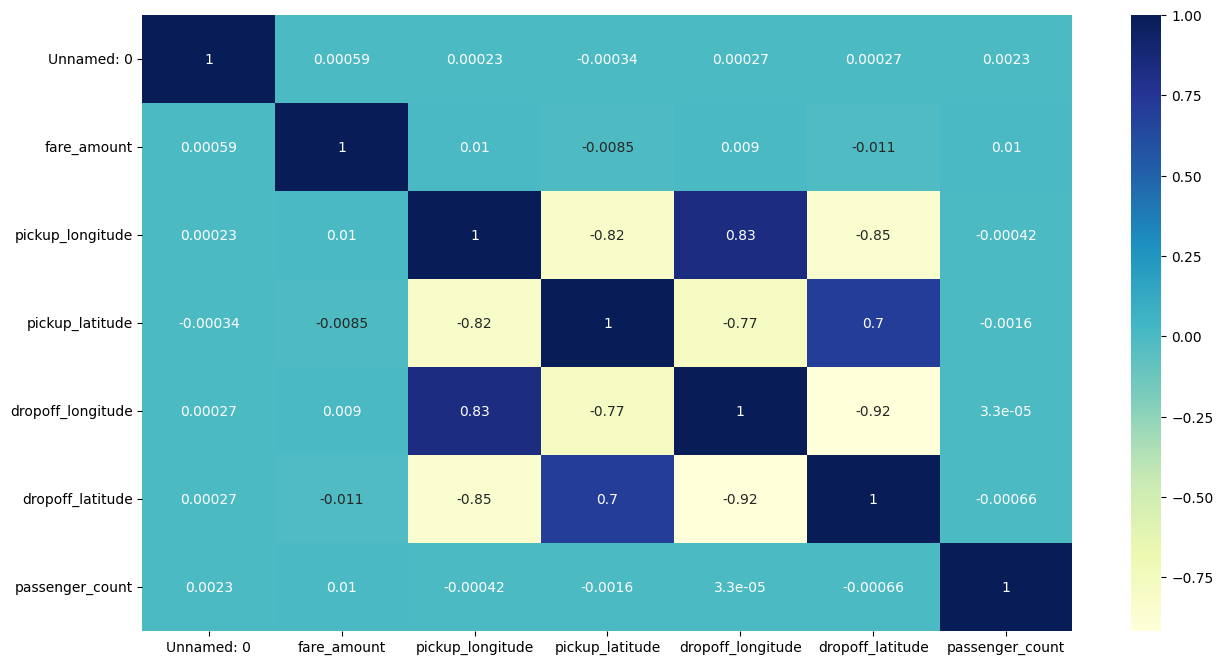

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [12]:

X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'passenger_count']]
y = data['fare_amount'] #Target

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

In [14]:

random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=10,random_state=42, n_jobs=-1)
random_forest_regressor.fit(X_train, y_train)
y_pred_rf = random_forest_regressor.predict(X_test)

In [15]:
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2


mse_linear, rmse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

In [16]:
print("Linear Regression Performance:")
print(f"MSE: {mse_linear}, RMSE: {rmse_linear}, R2: {r2_linear}")

Linear Regression Performance:
MSE: 103.9884071266138, RMSE: 10.197470623964248, R2: 0.00034152697863043535


In [17]:
print("Random Forest Regression Performance:")
print(f"MSE: {mse_rf}, RMSE: {rmse_rf}, R2: {r2_rf}")


Random Forest Regression Performance:
MSE: 36.75943310429615, RMSE: 6.0629558058999695, R2: 0.6466252365859422


In [18]:

data['predicted_fare_linear'] = linear_regressor.predict(X)
data['predicted_fare_rf'] = random_forest_regressor.predict(X)

result = data[['fare_amount', 'predicted_fare_linear', 'predicted_fare_rf']]
print(result)


        fare_amount  predicted_fare_linear  predicted_fare_rf
0               7.5              11.292764           8.934117
1               7.7              11.292323           8.394051
2              12.9              11.291560           8.230695
3               5.3              11.430829           8.313994
4              16.0              11.571896          13.483604
...             ...                    ...                ...
199995          3.0              11.292420           8.230695
199996          7.5              11.292625           8.230695
199997         30.9              11.362011          30.104343
199998         14.5              11.293171          14.155083
199999         14.1              11.292009          11.642093

[199999 rows x 3 columns]
